# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

%matplotlib inline
plt.rcParams['figure.figsize'] = (9,6)
pd.pandas.set_option('display.max_columns',None)

# **Exploratory Data Analysis**

#### **Getting the Dataset**

In [2]:
df = pd.read_csv("../input/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### **Getting the shape of the Dataset**

In [3]:
df.shape

(284807, 31)

#### **Finding null values in a Dataset**

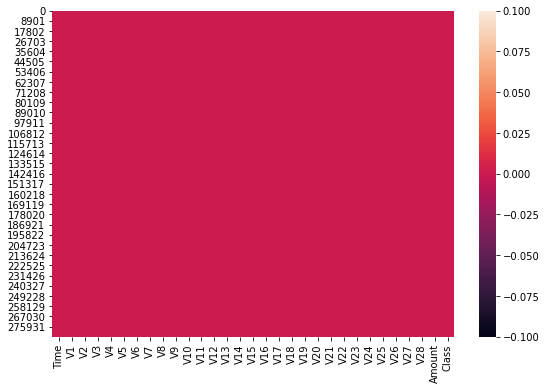

In [4]:
sns.heatmap(df.isnull())
plt.show()

#### There are **no null** values in the dataset

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

0 ===> Legit Transaction

1 ===> Fraud Transaction

The Dataset is **highly imbalanced**,so we need to balance the dataset.

#### **Balancing the Dataset**

In [7]:
legit = df[df["Class"]== 0]

fraud = df[df["Class"]== 1]
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [8]:
legit = legit.sample(n = 492)
print(legit.shape)

(492, 31)


#### **Concating the Dataset**


In [9]:
df_new = pd.concat([legit,fraud],axis =0)
df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
283540,171673.0,-0.817361,0.984226,2.018452,-0.511004,-0.391552,-0.936806,0.687812,-0.298864,0.782324,-0.217352,-0.099506,0.799518,0.795753,-0.756989,-0.056610,-0.457093,-0.387166,-0.106546,-0.679246,0.225449,0.247948,1.251107,-0.287645,0.986720,0.033167,-0.247170,0.215387,0.057191,3.36,0
98294,66602.0,1.415904,-1.085677,0.510314,-1.431583,-1.461509,-0.367234,-1.122579,0.053516,-2.035769,1.581713,1.527206,-0.343078,-0.218896,0.044997,0.166546,-0.530212,0.644062,0.008445,-0.387173,-0.390380,-0.127362,-0.006141,0.082560,0.185313,0.237045,-0.204783,0.038908,0.008440,15.00,0
23960,32999.0,-0.680762,0.698953,1.598124,1.505029,-0.068806,-0.285676,0.687023,0.074716,-0.326177,-0.136321,-0.162977,0.287441,-0.318313,0.080117,0.198040,-1.365144,0.828336,-0.815549,0.510622,0.288003,0.049220,0.346677,0.087139,0.608325,-0.132379,-0.257534,0.402847,0.217579,66.61,0
151456,95555.0,0.039588,1.065290,-0.534538,-1.070094,1.578389,-0.982989,1.668457,-0.561543,0.779890,-0.468440,1.814832,-2.142791,1.097244,2.166450,-1.528179,-0.558408,-0.023237,0.401982,-0.045585,-0.018682,0.091164,0.815379,-0.245484,0.751860,-0.379892,-0.034248,0.195086,0.036423,3.84,0
124567,77343.0,-0.343450,1.067552,1.031425,-0.214374,0.449343,-0.265261,0.605840,0.105248,-0.642411,-0.348238,0.911813,0.507079,0.387057,-0.319831,0.218497,0.768428,-0.505447,0.553011,0.455962,0.166080,-0.253406,-0.684926,-0.111663,-0.402074,-0.090353,0.096272,0.241869,0.081885,3.88,0


In [10]:
print(df_new.shape)

(984, 31)


# **Train Test Split**

In [11]:
x = df_new.drop(columns = "Class", axis =1)
y = df_new["Class"]

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.1,stratify= y, random_state = 0)

# **Model Training**

In [13]:
log = LogisticRegression(solver="liblinear")
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
svm = SVC(kernel='rbf', C=100)

In [14]:
def model_training(model,algorithm):
    model.fit(xtrain,ytrain)
    xtrain_predict = model.predict(xtrain)
    training_data_accuracy = accuracy_score(xtrain_predict, ytrain)
    
    xtest_predict = model.predict(xtest)
    test_data_accuracy = accuracy_score(xtest_predict, ytest)
    
    print(algorithm,'Accuracy on Training data : ', training_data_accuracy)
    print(algorithm,'Accuracy on Test data : ', test_data_accuracy)
    print()


model_training(log,"LogisticRegression")
model_training(rf,"RandomForestClassifier")
model_training(dt,"DecisionTreeClassifier")
model_training(svm,"SupportVectorClassifier")

LogisticRegression Accuracy on Training data :  0.9389830508474576
LogisticRegression Accuracy on Test data :  0.9292929292929293

RandomForestClassifier Accuracy on Training data :  1.0
RandomForestClassifier Accuracy on Test data :  0.9292929292929293

DecisionTreeClassifier Accuracy on Training data :  1.0
DecisionTreeClassifier Accuracy on Test data :  0.9090909090909091

SupportVectorClassifier Accuracy on Training data :  0.5830508474576271
SupportVectorClassifier Accuracy on Test data :  0.5656565656565656



### **Thank You**